In [1]:
packages <- c("Seurat", "dplyr", "Matrix", 
              "ggplot2", "pheatmap", "RColorBrewer", "NMF"
              )
lapply(packages, library, character.only = TRUE)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: pkgmaker

Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 59/60

  To enable shared memory capabilities, try: install.extras('
NMF
')



[[1]]
[1] "SeuratObject" "Seurat"       "stats"        "graphics"     "grDevices"   
[6] "utils"        "datasets"     "methods"      "base"        

[[2]]
 [1] "dplyr"        "SeuratObject" "Seurat"       "stats"        "graphics"    
 [6] "grDevices"    "utils"        "datasets"     "methods"      "base"        

[[3]]
 [1] "Matrix"       "dplyr"        "SeuratObject" "Seurat"       "stats"       
 [6] "graphics"     "grDevices"    "utils"        "datasets"     "methods"     
[11] "base"        

[[4]]
 [1] "ggplot2"      "Matrix"       "dplyr"        "SeuratObject" "Seurat"      
 [6] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[11] "methods"      "base"        

[[5]]
 [1] "pheatmap"     "ggplot2"      "Matrix"       "dplyr"        "SeuratObject"
 [6] "Seurat"       "stats"        "graphics"     "grDevices"    "utils"       
[11] "datasets"     "methods"      "base"        

[[6]]
 [1] "RColorBrewer" "pheatmap"     "ggplot2"      "Matrix"       "dplyr"       
 [6] "SeuratObject" "Seurat"       "stats"        "graphics"     "grDevices"   
[11] "utils"        "datasets"     "methods"      "base"        

[[7]]
 [1] "NMF"          "Biobase"      "BiocGenerics" "parallel"     "cluster"     
 [6] "rngtools"     "pkgmaker"     "registry"     "RColorBrewer" "pheatmap"    
[11] "ggplot2"      "Matrix"       "dplyr"        "SeuratObject" "Seurat"      
[16] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[21] "methods"      "base"

In [2]:
CTCL <- readRDS("/lustre/scratch117/cellgen/team205/rl20/CTCL/object-new/CTCL_Tcell_raw_no_nan.rds")

In [3]:
tumour_list <- read.table("/home/jovyan/farm/CTCL/malignant_marker/donor1-8_tumorcell_list.xls", header = T)
head(tumour_list)

,cell,state
,<chr>,<chr>
1,AACTCAGGTACAAGTA-1,CTCL1
2,AACTTTCTCTATGTGG-1,CTCL1
3,AAGCCGCAGAAACGAG-1,CTCL1
4,AAGGAGCAGACAGGCT-1,CTCL1
5,AATCCAGTCACGAAGG-1,CTCL1
6,ACACCGGCAAGCGTAG-1,CTCL1


In [4]:
donor <- 'CTCL6'
cells <- tumour_list$cell[which(tumour_list$state == donor)]

In [5]:
length(cells)

[1] 3800

In [6]:
CTCL_donor <- subset(x=CTCL, cells = cells)

In [7]:
dim(CTCL_donor)

[1] 33538  3800

In [8]:
head(CTCL_donor@meta.data)

,sample_id,donor_id,Tissue,mad_prd,ds,mad_MED,mad_MAD,mad_thr,batch,broad_cell_type,nFeaturess_RNA,percent_mito,nCounts_RNA,nCount_RNA,nFeature_RNA
,<fct>,<fct>,<fct>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ACACTGAGTCACTTCC-1-24,CTCL6_Derm45N_G,CTCL6,Dermis,FALSE,0.05196629,0.05065926,0.03490005,0.1902595,1,T-cell/NK/ILC,1426,0.16186176,2879,2879,1426
AAAGCAAAGATCACGG-1-25,CTCL6_Derm45P_8N_G,CTCL6,Dermis,FALSE,0.08903468,0.09390126,0.06785228,0.3653104,1,T-cell/NK/ILC,2895,0.06386005,7031,7031,2895
AACCATGCACCAGGCT-1-25,CTCL6_Derm45P_8N_G,CTCL6,Dermis,FALSE,0.12045455,0.09390126,0.06785228,0.3653104,1,T-cell/NK/ILC,1979,0.05497330,5057,5057,1979
AACCATGCAGGGTACA-1-25,CTCL6_Derm45P_8N_G,CTCL6,Dermis,FALSE,0.05467626,0.09390126,0.06785228,0.3653104,1,T-cell/NK/ILC,3005,0.03848315,10680,10680,3005
AACTCAGCAAGAAGAG-1-25,CTCL6_Derm45P_8N_G,CTCL6,Dermis,FALSE,0.06206897,0.09390126,0.06785228,0.3653104,1,T-cell/NK/ILC,2906,0.06401170,8889,8889,2906
AACTCAGCACCCATGG-1-25,CTCL6_Derm45P_8N_G,CTCL6,Dermis,FALSE,0.10466321,0.09390126,0.06785228,0.3653104,1,T-cell/NK/ILC,2649,0.06457818,7278,7278,2649


In [9]:
#write.table(rownames(Donor2@meta.data), file="/home/jovyan/farm/CTCL/malignant_marker/donor3_tumorcell_list.xls",quote=F, sep="\t",col.names=F, row.names=F)

In [10]:
#table(Donor2$clonotype)

In [11]:
CTCL_donor <- NormalizeData(CTCL_donor, normalization.method = "LogNormalize", scale.factor = 10000)
CTCL_donor <- FindVariableFeatures(CTCL_donor, selection.method = "vst")
CTCL_donor <- ScaleData(object = CTCL_donor, vars.to.regress = "percent_mito")

Regressing out percent_mito

Centering and scaling data matrix



In [12]:
data <- as.matrix(CTCL_donor@assays$RNA@scale.data)
data[data<0] <- 0

In [13]:
set.seed(123)
rk <- 10
res <- nmf(data, rank = rk, nrun = 1, seed=1)
s <- extractFeatures(res, 30L)
#V.hat <- fitted(res)

In [14]:
data1 <- c()
for (i in 1:as.numeric(rk)) {
  data1 <- rbind(data1, as.matrix(CTCL_donor@assays$RNA@scale.data)[s[[i]],])
  CTCL_donor <- AddModuleScore(object = CTCL_donor, features = list(rownames(data)[s[[i]]]), name = paste("Pg", i, sep = "_"))
}

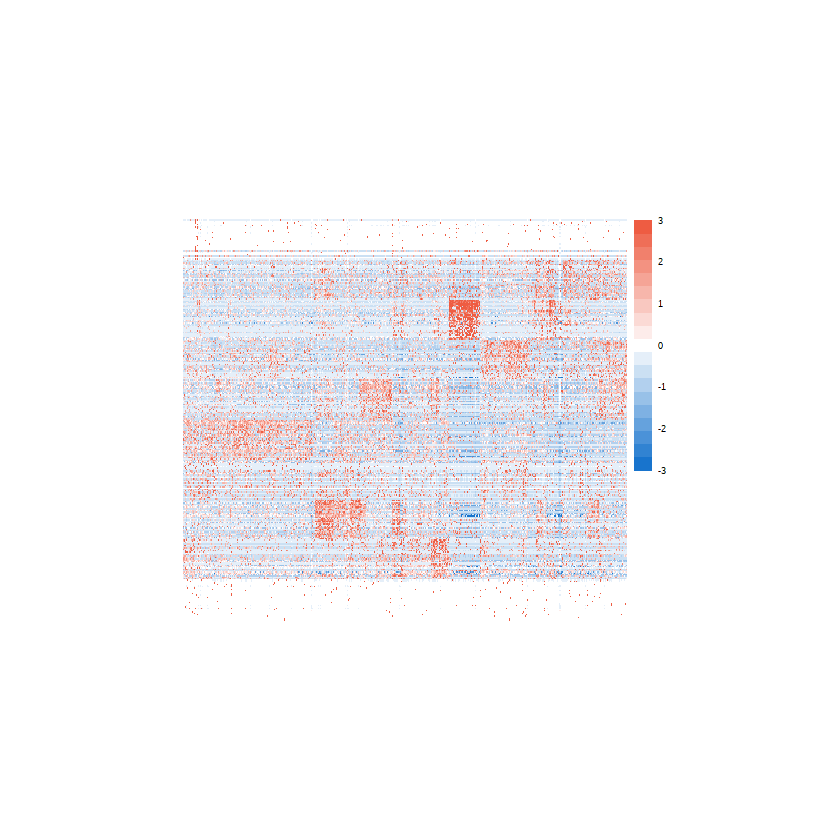

In [16]:
library(pheatmap)
library(RColorBrewer)

my_palette<-colorRampPalette(c("dodgerblue3","white","Tomato2"))(n=19)
data1[data1>3] <- 3
data1[data1< -3] <- -3
x <- pheatmap(data1,cluster_cols=T, cluster_rows=F, color=my_palette, scale="none",
              fontsize=5,treeheight_row=0,treeheight_col=0, cellheight = 0.8,cellwidth = 0.07,
              show_rownames=F,show_colnames=F, clustering_method = "ward.D",
              border_color=NA)

In [17]:
##### Filter programs ######
Pg_mat <- CTCL_donor@meta.data[ ,paste('Pg',"_",seq(1:rk), rep('1',rk), sep="")]
SD <- apply(Pg_mat, 2, sd)

In [18]:
SD

Pg_11      Pg_21      Pg_31      Pg_41      Pg_51      Pg_61      Pg_71 
0.06146881 0.25797345 0.67265336 0.28619774 0.31247223 0.35132847 0.14012733 
     Pg_81      Pg_91     Pg_101 
0.37458959 0.28047509 0.02592656

In [19]:
data2 <- c()
for (i in which(SD>0.1)) {
  data2 <- rbind(data2, as.matrix(CTCL_donor@assays$RNA@scale.data)[s[[i]],])
}

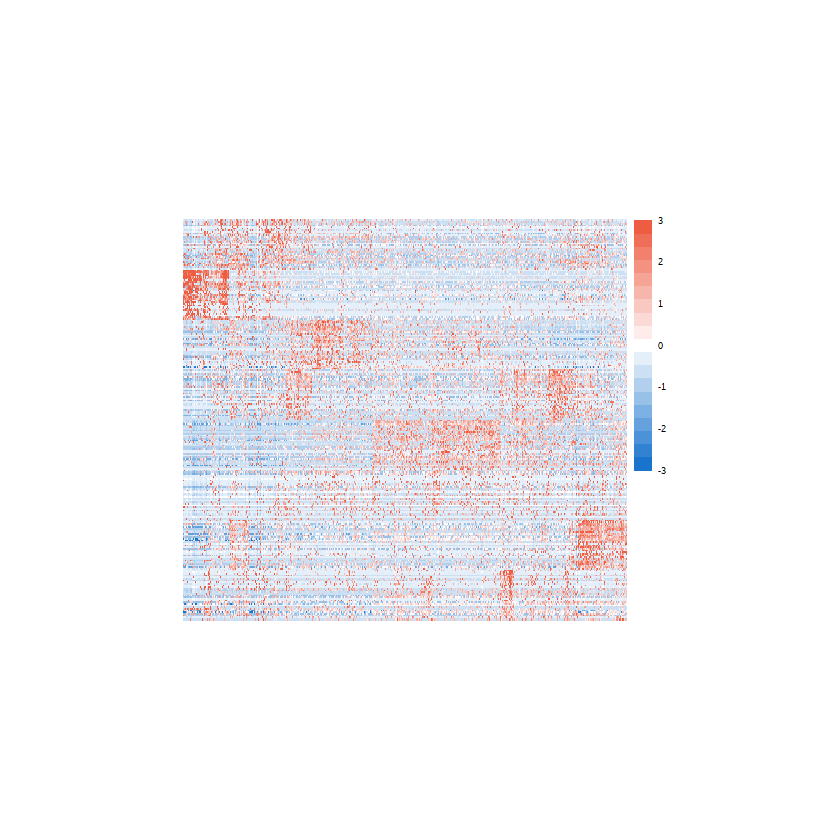

In [21]:
data2[data2>3] <- 3
data2[data2< -3] <- -3
x <- pheatmap(data2,cluster_cols=T, cluster_rows=F, color=my_palette, scale="none",
              fontsize=5,treeheight_row=0,treeheight_col=0, cellheight = 1,cellwidth = 0.07,
              show_rownames=F,show_colnames=F, clustering_method = "ward.D",
              border_color=NA)

In [80]:
write.table(data2, file="/home/jovyan/farm/CTCL/Expression_program/Donor_6_program_mat_thre_0.1_final.xls", quote=F, sep="\t")

In [21]:
library(pheatmap)
library(RColorBrewer)

Donor1 <- readRDS("/lustre/scratch117/cellgen/team205/rl20/CTCL/object/Donor1_tumor_raw.rds")
data <- read.table("/home/jovyan/farm/CTCL/Expression_program/Donor_1_program_mat_thre_0.1_final.xls",
                   check.names = F, row.names=NULL)
data <- as.matrix(data[ ,-1])
table(Donor1$clonotype)
#which(Donor2$clonotype=="Other_TCRs") ### ACGCAGCCAACGCACC-2
#which(colnames(data2)=="ACGCAGCCAACGCACC-2")
#data2 <- data2[,-which(Donor2$clonotype=="Other_TCRs")]



             Dominant_clonotype_donor1 Dominant_clonotype_donor1_alpha_orphan 
                                  6728                                    129 
 Dominant_clonotype_donor1_beta_orphan                                 No_TCR 
                                   507                                   1148 
                            Other_TCRs 
                                     7 

In [24]:
info <- Donor1@meta.data[,c("clonotype", "layer")]
info <- info[-which(Donor1$clonotype=="Other_TCRs"),]

#my_palette<-colorRampPalette(c("#18325C","#78ABCB","white","#E0876B","#631122"))(n=19)
#my_palette<-colorRampPalette(c("#18325C","dodgerblue3","white","Tomato","#631122"))(n=19)
my_palette<-colorRampPalette(c("dodgerblue3","white","Tomato2"))(n=19)
mycolors <- list(clonotype = c(Dominant_clonotype_donor1="Honeydew2", 
                               Dominant_clonotype_donor1_alpha_orphan="Goldenrod3", 
                               Dominant_clonotype_donor1_beta_orphan="darkgreen", 
                               No_TCR="DeepSkyBlue"),
                 layer = c(Epidermis = "black", Dermis = "grey80"))

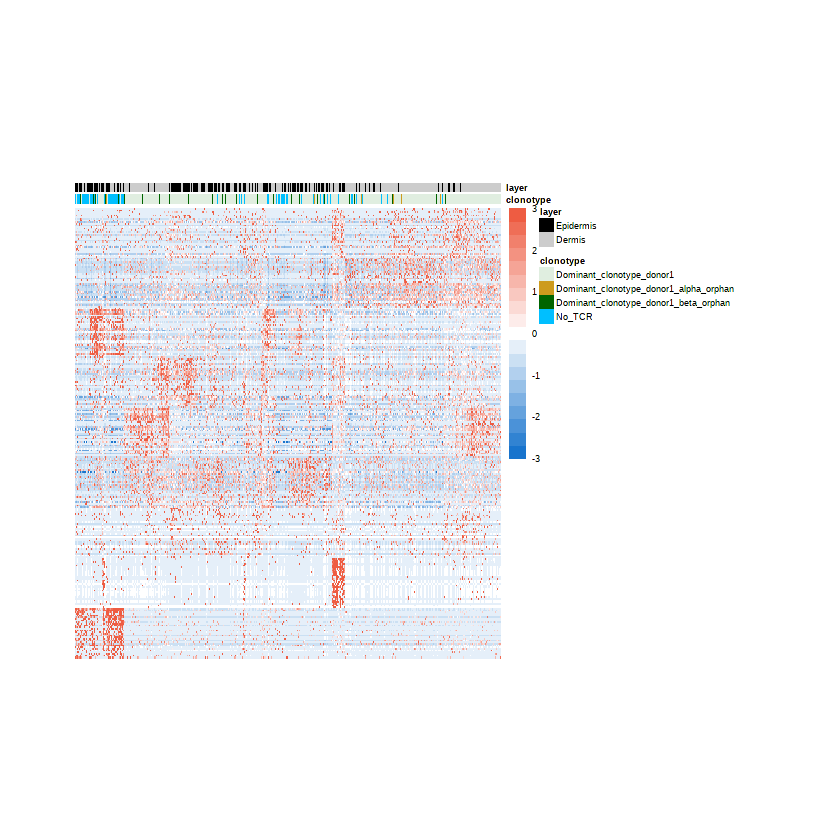

In [25]:
x <- pheatmap(data,cluster_cols=T, cluster_rows=F, color=my_palette, scale="none",
              fontsize=5,treeheight_row=0,treeheight_col=0, cellheight = 1,cellwidth = 0.03,
              show_rownames=F,show_colnames=F, clustering_method = "ward.D", annotation_col = info,
              annotation_colors = mycolors, border_color=NA)

In [29]:
#pdf(file='../figures/NMF_heatmap_donor1_final.pdf',w=8, h=8)
x <- pheatmap(data,cluster_cols=T, cluster_rows=F, color=my_palette, scale="none",
              fontsize=5,treeheight_row=0,treeheight_col=0, cellheight = 1, cellwidth = 0.03,
              show_rownames=F,show_colnames=F, clustering_method = "ward.D", annotation_col = info,
              annotation_colors = mycolors, border_color=NA, filename = '../figures/NMF_heatmap_donor1_final.pdf')
#dev.off()

In [5]:
library(dplyr)
library(Seurat)
library(Matrix)
library(ggplot2)
library(pheatmap)
library(RColorBrewer)
library(viridis)

Loading required package: viridisLite



In [3]:
Pgs <- read.table("/home/jovyan/farm/CTCL/Expression_program/program_Donors_1-8_thre_0.1_final.xls", header=T)

In [4]:
####### Jaccard Index #####
jac <- function(x, y) {
  inter <- intersect(x, y)
  total <- union(x, y)
  similarity <- length(inter)/length(total)
  return(similarity)
}

In [6]:
Mat <- matrix(0, ncol = ncol(Pgs), nrow = ncol(Pgs))
rownames(Mat) <- colnames(Pgs)
colnames(Mat) <- colnames(Pgs)

for (i in 1:ncol(Pgs)) {
  for (j in 1:ncol(Pgs)) {
    ss <- jac(as.vector(Pgs[,i]), as.vector(Pgs[,j]))
    Mat[i,j] <- ss*100
  }
}

In [7]:
custom_magma <- c(colorRampPalette(c("white", rev(magma(323, begin = 0.15))[1]))(10), rev(magma(323, begin = 0.18)))
#custom_magma<-colorRampPalette(c("white","blue"))(n=299)


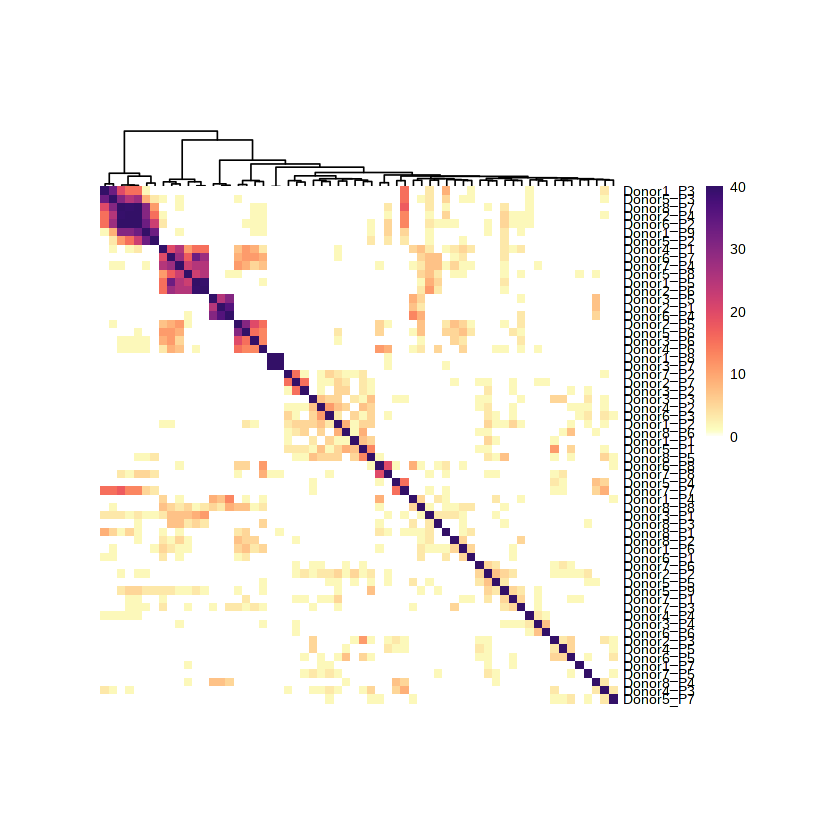

In [8]:
Mat[Mat>40] <- 40
x <- pheatmap(as.matrix(Mat), cluster_cols=T, cluster_rows=T, 
              clustering_distance_rows="euclidean", color=custom_magma, 
              fontsize=8,treeheight_row=0,treeheight_col=30, 
              cellheight = 5,cellwidth = 5,show_rownames=T, 
              show_colnames=F,clustering_method = "ward.D", border_color = "NA")
